In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import datetime
import itertools
from time import sleep
import os
import seaborn as sns
from itertools import chain

In [2]:
print datetime.datetime.now()
validFilePaths = []
for f in os.listdir("data/anomaly_data"):
    filePath = os.path.join("data/anomaly_data", f)
    if os.path.isdir(filePath):
        continue
    if os.stat(filePath).st_size <= 3:
        continue
    validFilePaths.append(filePath)
    
numF = int(1 * len(validFilePaths))
print 'Using this many files {0}'.format(numF)
validFilePaths = np.random.choice(validFilePaths, numF, replace=False)
df_list = (pd.read_csv(f) for f in validFilePaths)
df = pd.concat(df_list, ignore_index=True)
df = df[df['radiant_win'].notnull()]

2017-06-20 21:51:22.869660
Using this many files 4088


In [3]:
df2 = pd.DataFrame(np.loadtxt('data/goodAnomaliesResidual.csv', delimiter = ','), 
                 columns = ["match_id", "residual"])

df = df.merge(df2, left_on='match_id', right_on='match_id')

matchDictionary = {}
heroColumns = [filter(lambda x: z in x, df.columns) for z in ['hero_id']][0]

# for each row, this function will return all the heroes that the match belongs in
# for example, if the match had an AM and Spectre, we should place this match in each of those bags
def heroesForMatch(row):
    pass

In [4]:
df = df[~df['match_id'].duplicated()]

In [5]:
df = df.sort_values(by='residual', ascending=False)

In [6]:
columns = df.columns
numericalFeatures = ['match_id', 'positive_votes', 'negative_votes', 'first_blood_time', 'radiant_win',
                    'duration', 'kills', 'deaths', 'assists', 'kpm', 'kda', 'hero_dmg',
                    'gpm', 'hero_heal', 'xpm', 'totalgold', 'totalxp', 'lasthits', 'denies',
                    'tower_kills', 'courier_kills', 'observer_uses', 'sentry_uses',
                    'ancient_kills', 'camps_stacked', 'abandons', 'residual']
numFeatures = [filter(lambda x: z in x, columns) for z in numericalFeatures]
numFeatures = list(chain(*numFeatures))
df = df[numFeatures]

In [7]:
df['match_id'].values.tolist()

[3215497967,
 3215097220,
 3215312675,
 3215162338,
 3215181105,
 3215377994,
 3215271631,
 3215289100,
 3215279863,
 3215253055,
 3215448302,
 3215416370,
 3215261563,
 3215294948,
 3215155134,
 3215350255,
 3215341221,
 3215306187,
 3215302636,
 3215316820,
 3215190109,
 3215355847,
 3215130854,
 3215259897,
 3215394671,
 3215152225,
 3215274711,
 3215366609,
 3215449992,
 3215376405,
 3215268540,
 3215420902,
 3215332931,
 3215327547,
 3215354992,
 3215254939,
 3215149372,
 3215370025,
 3215201012,
 3215272070,
 3215223639,
 3215422492,
 3215260456,
 3215354934,
 3215377592,
 3215445972,
 3215101148,
 3215174827,
 3215384305,
 3215188370,
 3215297782,
 3215493515,
 3215119808,
 3215360521,
 3215102154,
 3215271055,
 3215403667,
 3215217460,
 3215482564,
 3215466626,
 3215255292,
 3215095789,
 3215108689,
 3215330831,
 3215468550,
 3215446132,
 3215384555,
 3215470445,
 3215318005,
 3215238829,
 3215293087,
 3215391855,
 3215439074,
 3215401870,
 3215440922,
 3215092973,
 3215369622,

In [8]:
df['residual'].values.tolist()

[60.09383010864258,
 22.98058319091797,
 14.018461227416992,
 12.276541709899902,
 10.960655212402344,
 10.190336227416992,
 9.797115325927734,
 8.665862083435059,
 8.291083335876465,
 6.753566265106201,
 5.982767105102539,
 5.009283542633057,
 4.787799835205078,
 4.737585544586182,
 4.151325702667236,
 3.8586721420288086,
 3.7200565338134766,
 3.653451919555664,
 3.6120126247406006,
 3.55796217918396,
 3.5249321460723877,
 3.4550528526306152,
 3.4301578998565674,
 2.9261271953582764,
 2.8132457733154297,
 2.767648220062256,
 2.758488178253174,
 2.543581247329712,
 2.5158803462982178,
 2.4831578731536865,
 2.4762089252471924,
 2.392141342163086,
 2.38230299949646,
 2.3297765254974365,
 2.2398288249969482,
 2.229811429977417,
 2.1894421577453613,
 2.1700241565704346,
 2.150897741317749,
 2.0817346572875977,
 2.0602142810821533,
 2.044538974761963,
 2.038116693496704,
 2.0010886192321777,
 1.953024983406067,
 1.9425238370895386,
 1.919196367263794,
 1.8698474168777466,
 1.823149442672729

In [9]:
percentile99 = np.percentile(df['residual'], 99)

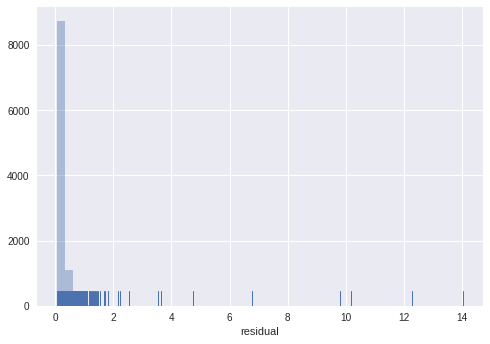

In [10]:
sns.distplot(df['residual'].sample(n=10000),  kde=False, rug=True)
plt.show()

In [11]:
len(df)

42798

In [12]:
plt.close()

In [13]:
residuals = df['residual'].values.tolist()

In [14]:
np.max(residuals) - np.min(residuals)

60.033355519175529

In [15]:
def RadiantDireDifference(row, column):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    radiantSum = 0
    direSum = 0
    for pos in poss:
        radiantSum += row['radiant_'+ pos + '_' + column]
        direSum += row['dire_'+ pos + '_' + column]
    return radiantSum - direSum

def reject_outliers(data, m=1.5):
    return abs(data - np.mean(data)) < m * np.std(data)


def heroKDAdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] + \
                        row[fac + '_' + pos + '_assists'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKDdeficit(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = value
    return returnVal

def heroKD(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_kills'] - \
                        row[fac + '_' + pos + '_deaths']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = int(pos[3:4])
    return returnVal

def heroGoldSpent(row):
    faction = ['radiant', 'dire']
    poss = ['pos1', 'pos2', 'pos3', 'pos4', 'pos5']
    largestAbsoluteSoFar = -1
    returnVal = -1
    for pos in poss:
        for fac in faction:
            value = row[fac + '_' + pos + '_gold_spent']
            if abs(value) >= largestAbsoluteSoFar:
                largestAbsoluteSoFar = abs(value)
                returnVal = int(pos[3:4])
    return returnVal

In [16]:
vote_mask = (df['positive_votes'] == 0) & (df['negative_votes'] == 0)
def outlier_mask(data, other_mask = vote_mask, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return np.logical_and(s<m, other_mask)

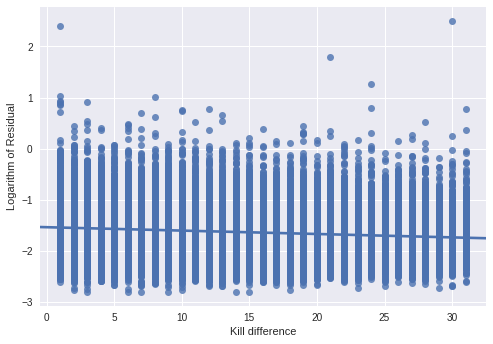

In [17]:
kill_difference = np.abs(df.apply(RadiantDireDifference, args=('kills',), axis=1))
kill_difference_mask = outlier_mask(kill_difference)
sns.regplot(kill_difference[kill_difference_mask], np.log(df['residual'][kill_difference_mask]))
ax = plt.gca()
ax.set_xlabel("Kill difference")
ax.set_ylabel("Logarithm of Residual")
plt.savefig('graphs/Kill_Difference.png', bbox_inches='tight')
plt.show()

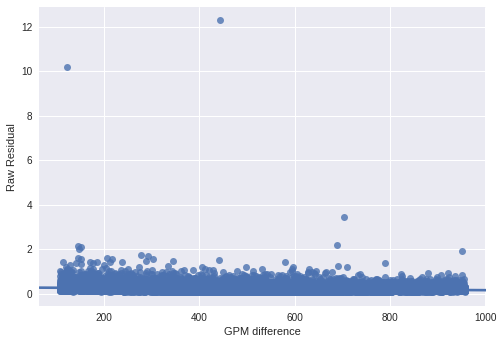

In [18]:
gold_difference = np.abs(df.apply(RadiantDireDifference, args=('gpm',), axis=1))
gold_difference_mask = outlier_mask(gold_difference)
sns.regplot(np.abs(gold_difference)[gold_difference_mask], df['residual'][gold_difference_mask])
ax = plt.gca()
ax.set_xlabel("GPM difference")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/GPM_Difference.png', bbox_inches='tight')
plt.show()

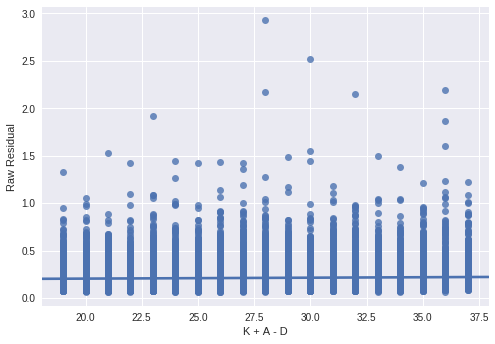

In [19]:
kda = df.apply(heroKDAdeficit, axis=1)
kda_mask = outlier_mask(kda)
sns.regplot(kda[kda_mask], df['residual'][kda_mask])
ax = plt.gca()
ax.set_xlabel("K + A - D")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/MaxKAD_Difference.png', bbox_inches='tight')
plt.show()

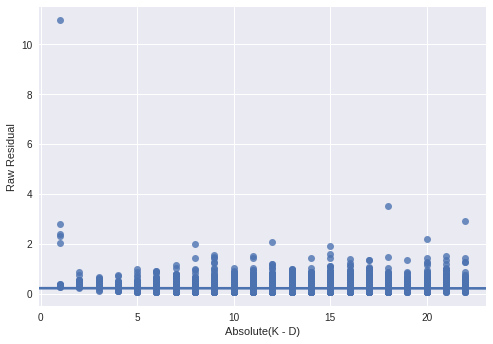

In [20]:
kd = df.apply(heroKDdeficit, axis=1)
kd_mask = outlier_mask(kd)
sns.regplot(np.abs(kd)[kd_mask], df['residual'][kd_mask])
ax = plt.gca()
ax.set_xlabel("Absolute(K - D)")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/absolutek-d_Difference.png', bbox_inches='tight')
plt.show()

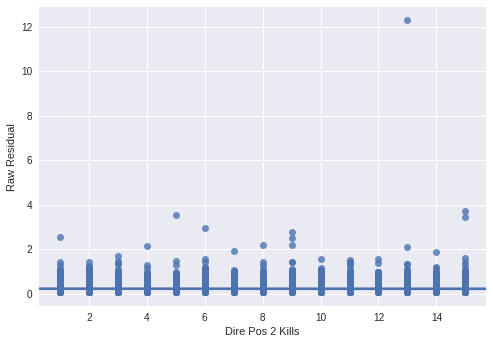

In [21]:
direpos2kills = df['dire_pos2_kills']
direpos2kills_mask = outlier_mask(direpos2kills)
sns.regplot(df['dire_pos2_kills'][direpos2kills_mask], df['residual'][direpos2kills_mask])
ax = plt.gca()
ax.set_xlabel("Dire Pos 2 Kills")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/direpos2kills.png', bbox_inches='tight')
plt.show()

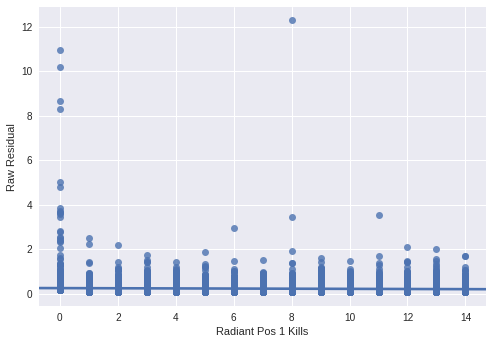

In [22]:
radiantpos1kills = df['radiant_pos1_kills']
radiantpos1kills_mask = outlier_mask(radiantpos1kills)
sns.regplot(df['radiant_pos1_kills'][radiantpos1kills_mask], df['residual'][radiantpos1kills_mask])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 1 Kills")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/radiantpos1kills.png', bbox_inches='tight')
plt.show()

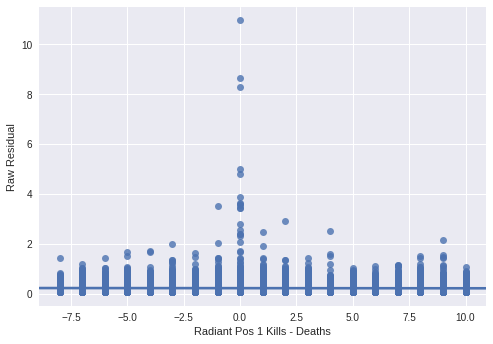

In [23]:
radiantpos1kd = df['radiant_pos1_kills'] - df['radiant_pos1_deaths']
radiantpos1kd_mask = outlier_mask(radiantpos1kd)
sns.regplot(radiantpos1kd[radiantpos1kd_mask], df['residual'][radiantpos1kd_mask])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 1 Kills - Deaths")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/radiantpos1killsminusdeaths.png', bbox_inches='tight')
plt.show()

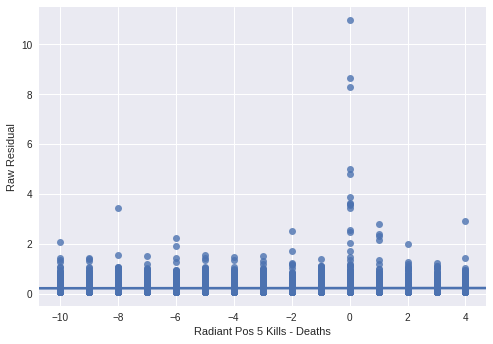

In [24]:
radiantpos5kd = df['radiant_pos5_kills'] - df['radiant_pos5_deaths']
radiantpos5kd_mask = outlier_mask(radiantpos5kd)
sns.regplot(radiantpos5kd[radiantpos5kd_mask], df['residual'][radiantpos5kd_mask])
ax = plt.gca()
ax.set_xlabel("Radiant Pos 5 Kills - Deaths")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/radiantpos5killsminusdeaths.png', bbox_inches='tight')
plt.show()

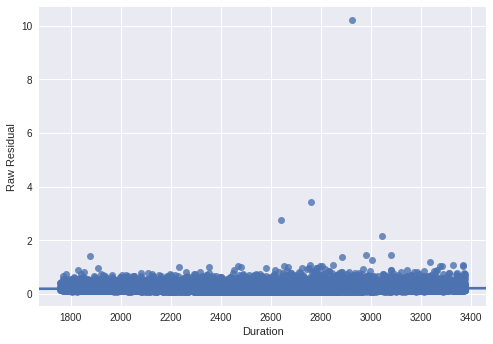

In [25]:
duration = df['duration']
duration_mask = outlier_mask(duration)
sns.regplot(df['duration'][duration_mask], df['residual'][duration_mask])
ax = plt.gca()
ax.set_xlabel("Duration")
ax.set_ylabel("Raw Residual")
plt.savefig('graphs/durationresidual.png', bbox_inches='tight')
plt.show()

In [26]:
df[df['residual'] > percentile99]

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_abandons,dire_pos3_abandons,dire_pos4_abandons,dire_pos5_abandons,radiant_pos1_abandons,radiant_pos2_abandons,radiant_pos3_abandons,radiant_pos4_abandons,radiant_pos5_abandons,residual
40056,3215497967,49,2,14,True,2748,43.0,0.0,4,141.0,...,0,0,0,0,0,0,0,0,0,60.093830
3222,3215097220,15,7,15,True,2470,23.0,0.0,7,108.0,...,0,0,0,0,0,0,0,0,0,22.980583
42706,3215312675,9,4,0,False,2687,0.0,0.0,10,9.0,...,0,0,0,0,0,0,0,0,0,14.018461
14505,3215162338,0,0,135,False,3981,18.0,21.0,27,70.0,...,0,0,0,0,0,0,0,0,0,12.276542
8310,3215181105,0,0,0,True,0,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,1,0,10.960655
6186,3215377994,0,0,72,False,2924,NaN,NaN,28,NaN,...,0,0,0,0,0,0,0,0,0,10.190336
10574,3215271631,7,1,3,False,1846,4.0,0.0,5,36.0,...,0,0,0,0,0,0,0,0,0,9.797115
28970,3215289100,0,0,0,False,0,NaN,NaN,0,NaN,...,0,0,1,0,0,0,0,0,0,8.665862
32230,3215279863,0,0,0,False,0,NaN,NaN,0,NaN,...,0,0,1,0,0,0,0,0,0,8.291083
1609,3215253055,5,0,182,True,1949,0.0,0.0,4,10.0,...,0,0,0,0,0,0,0,0,0,6.753566


In [27]:
df[df['residual'] < percentile99].sample(n=10, random_state=1)

,match_id,positive_votes,negative_votes,first_blood_time,radiant_win,duration,dire_pos1_ancient_kills,dire_pos1_courier_kills,dire_pos1_kills,dire_pos1_neutral_kills,...,dire_pos2_abandons,dire_pos3_abandons,dire_pos4_abandons,dire_pos5_abandons,radiant_pos1_abandons,radiant_pos2_abandons,radiant_pos3_abandons,radiant_pos4_abandons,radiant_pos5_abandons,residual
15328,3215105241,0,0,112,False,2777,NaN,NaN,24,NaN,...,0,0,0,0,0,0,0,0,0,0.174453
26872,3215376151,0,0,114,True,2399,NaN,NaN,7,NaN,...,0,0,0,0,0,0,0,0,0,0.108168
9558,3215415736,0,0,169,False,3833,NaN,NaN,20,NaN,...,0,0,1,0,0,0,0,0,0,0.539407
38056,3215109078,0,0,191,False,3583,1.0,0.0,15,51.0,...,0,0,0,0,0,0,0,0,0,0.522020
28038,3215171445,0,0,106,True,3963,NaN,NaN,14,NaN,...,0,0,0,0,0,0,0,0,0,0.219839
19879,3215172311,1,0,60,True,4322,NaN,NaN,4,NaN,...,0,0,0,0,0,0,0,0,0,0.478943
23736,3215186932,0,0,402,True,2640,NaN,NaN,10,NaN,...,0,0,0,0,0,0,0,0,0,0.108369
24764,3215409668,0,0,179,False,2451,NaN,NaN,9,NaN,...,0,0,0,0,0,0,1,0,0,0.138435
3126,3215384337,0,0,146,True,3289,NaN,NaN,8,NaN,...,0,0,0,0,0,0,1,0,0,0.514544
5952,3215141313,0,0,126,False,2572,3.0,0.0,11,116.0,...,0,0,0,0,0,0,0,0,0,0.341837


In [28]:
biggestAnom = np.loadtxt('data/anomalies.csv', delimiter = ',')
theirOutput = np.loadtxt('data/output.csv', delimiter = ",")

In [29]:
biggestAnom = np.column_stack([df['match_id'].values, biggestAnom])
theirOutput = np.column_stack([df['match_id'].values, theirOutput])

In [30]:
dictToEndAllDicts = {'match_id': [], 'column': [], 'actual': [], 'predicted': []}

In [31]:
def whichIndex(row1, row2):
    largestError = -1
    index = -1
    for i in range(1, len(row1)):
        if abs(row1[i] - row2[i]) > largestError:
            largestError = abs(row1[i] - row2[i])
            index = i
    return index
columns = list(df.columns)
columns.remove('match_id')
mask = np.where(df['residual'] >= percentile99)[0]

biggestAnom = biggestAnom[mask, :]
theirOutput = theirOutput[mask, :]

for i in range(len(biggestAnom)):
    index = whichIndex(biggestAnom[i, :], theirOutput[i, :])
    dictToEndAllDicts['match_id'].append(int(biggestAnom[i, 0]))
    dictToEndAllDicts['column'].append(columns[index])
    dictToEndAllDicts['actual'].append(biggestAnom[i, index])
    dictToEndAllDicts['predicted'].append(theirOutput[i, index])

In [32]:
tableOfAnomalies = pd.DataFrame.from_dict(dictToEndAllDicts)

In [33]:
tableOfAnomalies.to_csv('data/tableOfAnomaliesAndTheirCause.csv', index = False)

In [34]:
tableOfAnomalies

,actual,column,match_id,predicted
0,49.000000,negative_votes,3215497967,1.000000
1,15.000000,negative_votes,3215097220,1.000000
2,9.000000,negative_votes,3215312675,1.000000
3,0.997236,dire_pos5_courier_kills,3215162338,0.254108
4,0.967832,radiant_pos3_gpm,3215181105,0.215278
5,0.986188,dire_pos5_kda,3215377994,0.675354
6,7.000000,negative_votes,3215271631,1.000000
7,0.915403,dire_pos4_gpm,3215289100,0.162801
8,0.915403,dire_pos4_gpm,3215279863,0.155206
9,5.000000,negative_votes,3215253055,1.000000
